#### 1. Importing libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import hough_line, hough_line_peaks

#### 1.1 Function definition

In [3]:
# Function to detect and annotate patterns using Hough Transform with line filtering
def detect_lines(img, angle_range, color, threshold, min_line_distance=30):
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    annotated_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        filtered_lines = []
        for rho, theta in lines[:, 0]:
            angle = np.degrees(theta)
            if angle_range[0] <= angle <= angle_range[1]:
                if all(abs(rho - prev_rho) > min_line_distance for prev_rho, _ in filtered_lines):
                    filtered_lines.append((rho, theta))

        for rho, theta in filtered_lines:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(annotated_img, (x1, y1), (x2, y2), color, 2)

    return annotated_img

#### 1.2 Application of the Hough transform

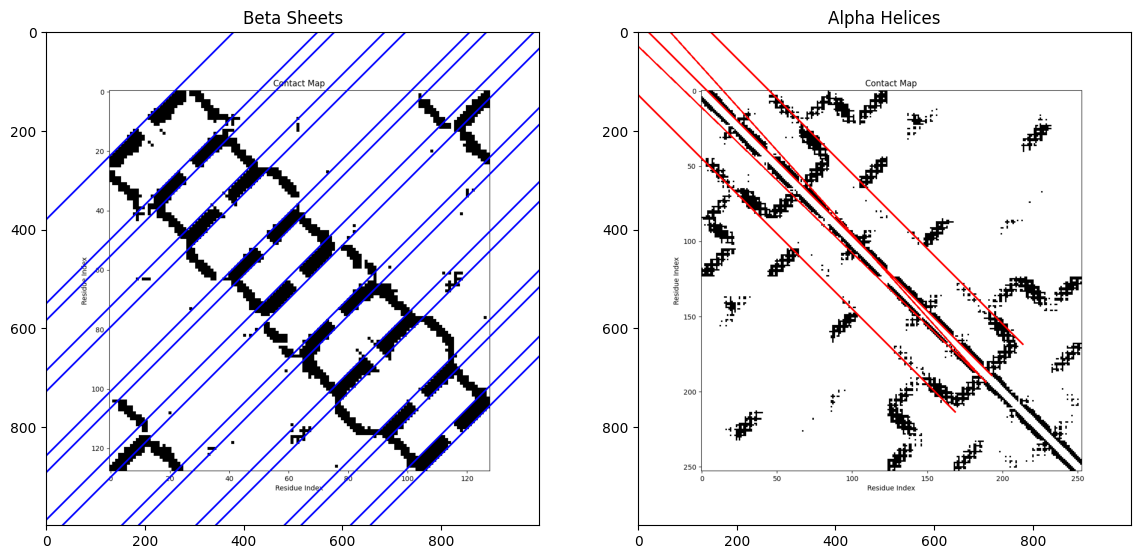

In [5]:
# Define the angle ranges for alpha helices and beta sheets
alpha_helix_angle_range = (120, 150)  # Adjust to detect lines parallel to the main diagonal
beta_sheet_angle_range_final = (40, 55)

# Upload the images
beta_sheet_img_path = '1i78.png'
alpha_helix_img_path = '1pw4.png'

beta_sheet_img = cv2.imread(beta_sheet_img_path, cv2.IMREAD_GRAYSCALE)
alpha_helix_img = cv2.imread(alpha_helix_img_path, cv2.IMREAD_GRAYSCALE)

if beta_sheet_img is None:
    raise FileNotFoundError(f"Imagem não encontrada: {beta_sheet_img_path}")
if alpha_helix_img is None:
    raise FileNotFoundError(f"Imagem não encontrada: {alpha_helix_img_path}")

# Detect and annotate alpha helices
annotated_alpha_helix_img = detect_lines(alpha_helix_img, alpha_helix_angle_range, (0, 0, 255), threshold=100, min_line_distance=30)

# Detect and annotate beta sheets
annotated_beta_sheet_img_final = detect_lines(beta_sheet_img, beta_sheet_angle_range_final, (255, 0, 0), threshold=50, min_line_distance=20)

# Save annotated images
cv2.imwrite('annotated_beta_sheets.png', annotated_beta_sheet_img_final)
cv2.imwrite('annotated_alpha_helices.png', annotated_alpha_helix_img)

# Show annotated images
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(annotated_beta_sheet_img_final, cv2.COLOR_BGR2RGB))
plt.title('Beta Sheets')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(annotated_alpha_helix_img, cv2.COLOR_BGR2RGB))
plt.title('Alpha Helices')
plt.show()